Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research

Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
EmpData=pd.read_csv('Absenteeism_at_work.csv', sep=';')
EmpData


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
EmpData.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [4]:
EmpData.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [5]:
EmpData.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
#For categorical features   Month of absence
EmpData['Month of absence']= EmpData.apply(lambda x: EmpData['Month of absence'].fillna(EmpData['Month of absence'].value_counts().index[0]))


In [7]:
EmpData.isnull().sum()


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
EmpData.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


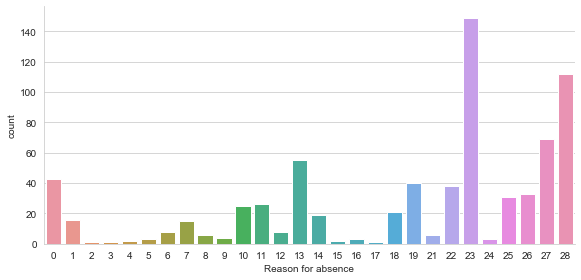

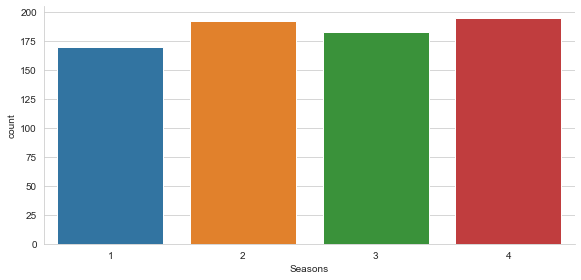

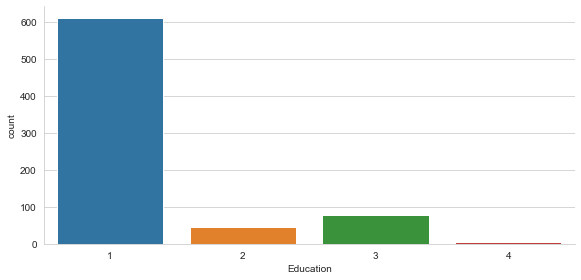

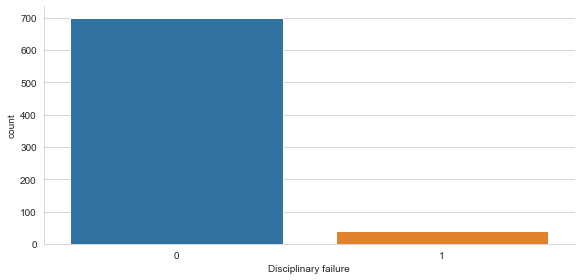

In [9]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=EmpData, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EmpData, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EmpData, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EmpData, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

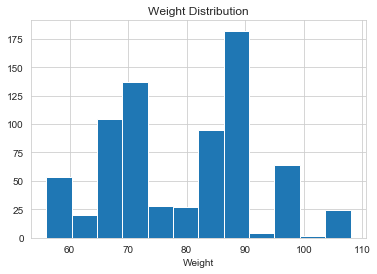

In [10]:
#Check the distribution of Weight
plt.hist(data=EmpData, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

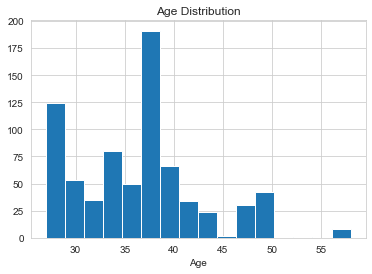

In [11]:
#Check the distribution of Age
plt.hist(data=EmpData, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

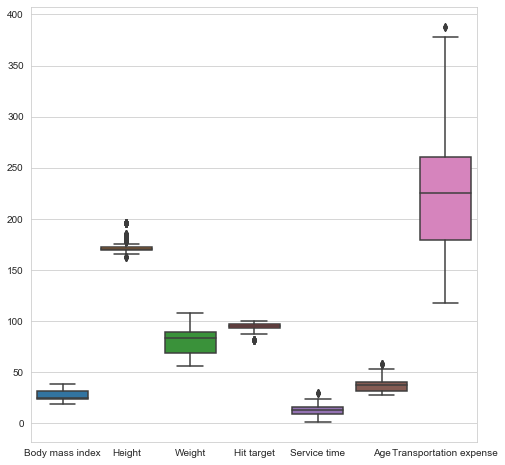

In [12]:

# data using boxplot
sns.boxplot(data=EmpData[['Body mass index','Height','Weight','Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [13]:
# Another Methode : IQR score technique to remove Outliers 
data=EmpData
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
dfIQR = data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dfIQR.shape)

(21,)
(403, 21)


In [14]:
x=dfIQR.drop(['Absenteeism time in hours'],axis=1)
x.shape

(403, 20)

In [15]:
y=dfIQR['Absenteeism time in hours']
y=np.array(y).reshape(-1,1)

In [16]:
x.skew()

ID                                -0.056726
Reason for absence                -1.332106
Month of absence                   0.037721
Day of the week                    0.058320
Seasons                            0.064860
Transportation expense             0.067714
Distance from Residence to Work   -0.038187
Service time                       0.357967
Age                                0.007247
Work load Average/day              0.607572
Hit target                        -0.478418
Disciplinary failure               0.000000
Education                          0.000000
Son                                1.171428
Social drinker                    -0.401312
Social smoker                      0.000000
Pet                                0.825383
Weight                             0.171335
Height                            -0.616297
Body mass index                    0.452991
dtype: float64

In [17]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [18]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

2.4266899556114314

In [21]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,8,4.863838
1,8,4.739594
2,2,3.820753
3,8,4.939556
4,3,3.867444
...,...,...
76,3,3.867444
77,2,3.047613
78,2,2.390888
79,3,2.918415


In [22]:
x.shape

(403, 20)

#  Apply PCA

In [23]:

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
n={"n_components":range(1,20)}
pcv=GridSearchCV(pca,n,cv=10)
pcv.fit(x,y)
pcv.best_params_

{'n_components': 16}

In [24]:
pca=PCA(n_components=16)
px=pca.fit_transform(x)
px.shape

(403, 16)

In [25]:
from sklearn.model_selection import train_test_split
train_px,test_px,train_py,test_py=train_test_split(px,y,test_size=.22,random_state=42)

In [26]:
#Linear Regression
pca_regressor = LinearRegression()  
pca_regressor.fit(train_px, train_py)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
py_pred = pca_regressor.predict(test_px)

In [35]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_py, py_pred))
rmse

2.4061978527618657

In [54]:
df = pd.DataFrame({'Actual': np.array(test_py)[:,0], 'Predicted': py_pred[:,0]})
df

,Actual,Predicted
0,8,5.122340
1,8,4.314486
2,2,3.739823
3,8,5.647712
4,3,3.738916
...,...,...
84,1,5.750412
85,4,4.824263
86,4,4.738253
87,2,2.967193


In [55]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(pca_regressor,'Absenteeism_Model.obj')




['Absenteeism_Model.obj']

# Conclusion
    Preparing the Linear Regression model for  Absenteeism
    Check Null values
    verify the outliers
    prepare liner regression model
    apply PCA
    
    
     
